In [121]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set(style="whitegrid", color_codes=True)



In [122]:
def list_files(files):
    """Accepts a list and returns a dictionary of each item in list with a numbered index (key) starting at 1"""

    dir_list = {0:'Exit'}
    file_count = 0
    for file in files:
        file_count +=1
        dir_list[file_count] = file  # assign a number to each item in the list starting with 1 
    return dir_list  # returns the dictionary of items in the list

def print_dict(dict_items):
    """Prints the (key : value) pairing in a dictionary"""

    for key, value in dict_items.items():
        print(key, ":", value)    

def check_dict(dict_to_check, choice):
    """Checks if the input choice is a key in the provided dictionary
        and returns 'valid' if true, 'invalid' if false"""

    if choice in dict_to_check:
        return "valid"
    else:
        return "invalid"

def error_message(invalid_choice):
    print(f"Your input of '{invalid_choice}' is not a valid choice. Try again!")

def validate_int(user_input):
    """Checks if user input is an int or can be converted to an int. If true returns 'valid', if false returns 'invalid'"""

    try:
        int(float(user_input))
        return "valid"
    except ValueError:
        return "invalid"

def target_test_keys(keys): 
    """Accepts a list of lists and returns a list of the first value from each list"""
    
    spec_keys = []
    for i in range(len(keys)):
        spec_keys.append(keys[i][0])
    return spec_keys

def get_target_columns(col_list, spec_keys):
    target_columns = []
    for i in range(len(col_list)):
        if col_list[i] in spec_keys:
            target_columns.append(col_list[i])
    return target_columns

def create_spec_dict(spec_arr):
    new_dict = {}
    new_list = []
    for i in range(len(spec_arr)):
        new_list = [spec_arr[i][1],spec_arr[i][2]]
        new_dict[spec_arr[i][0]] = new_list
    return new_dict

def combine_limits(targ_col,prod_spec_dict):  # This is making an assumption that the lower limits are listed before upper limits in specifications file
    prod_ll = []
    prod_ul = []
    prod_ll_dict = {}
    prod_ul_dict = {}
    for i in range(len(targ_col)):
        key = targ_col[i]
        prod_ll.append(prod_spec_dict[key][0])
        prod_ul.append(prod_spec_dict[key][1])
        
    prod_ll_dict['lower_limits'] = prod_ll  # create dict of lower limits
    prod_ul_dict['upper_limits'] = prod_ul  # create dict of upper limits
    return {**prod_ll_dict, **prod_ul_dict}  # return dict of both dictionaries

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def create_boxplot(df,test_key,spec_limits,prod_name):
    low_spec = spec_limits[0]
    upp_spec = spec_limits[1]

    plt.figure(figsize=(10,6))
    sns.boxplot(x=test_key, y='Raws Combined',data=df)
    sns.stripplot(x=test_key, y='Raws Combined',data=df,color='black',alpha=0.35)
    plt.axvline(low_spec,color='red',label="LSL")
    plt.axvline(upp_spec,color='red',label="USL")
    plt.title(prod_name + " " + test_key)
    plt.xlabel("")
    plt.ylabel("")

### Display file options to user

In [123]:
product_options = sorted(list(('BR0010P850','YL0010C229')))
user_options = list_files(product_options)  # returned dict of files in directory
print_dict(user_options)

0 : Exit
1 : BR0010P850
2 : YL0010C229


### Allow user to choose a product displayed above

In [124]:
user_choice = input('Enter the number next to the file to open. (0 to exit): ')
validate_choice = validate_int(user_choice) # confirm user input is an int or can be converted to an int 
if validate_choice == 'valid':
    user_choice = int(float(user_choice))
    validate_choice = check_dict(user_options, user_choice) # check to see if user input is a key in the dictionary
while validate_choice == 'invalid':
    error_message(user_choice)
    user_choice = input('Enter the number next to the file to open. (0 to exit): ')
    validate_choice = validate_int(user_choice)
    if validate_choice == 'valid':
        user_choice = int(float(user_choice))
        validate_choice = check_dict(user_options, user_choice) # check to see if user input is a key in the dictionary

selected_product = user_options[user_choice]
if selected_product == 'Exit':
    print(f'No product selected')
else:
    print(f'You selected {selected_product}')

You selected BR0010P850


### Set file paths

In [125]:
if selected_product == 'Exit':
    print('No product was selected from the cell above. Please select a product in the cell above to continue.')
else:
    path = 'data/'
    file_ext = ".xlsx"
    prod_ingredient_file = path + selected_product + "_ingredients" + file_ext
    prod_color_results = path + selected_product + "_color_results" + file_ext
    approved_ingredients = path + "approved_ingredients" + file_ext  # all products are in this file
    formulas = path + "formulas" + file_ext  # all products are in this file
    specifications = path + "specifications" + file_ext  # all product specs are in this file

### Read files into pandas dataframe

In [126]:
ingredient_df = pd.read_excel(prod_ingredient_file)  # ingriendients used for each batch of selected product
color_results_df= pd.read_excel(prod_color_results)  # color results for each batch of selected product
approv_ingred_df = pd.read_excel(approved_ingredients).sort_values(by=['Material','rm_code'])
approv_ingred_df = approv_ingred_df[approv_ingred_df['Material']== selected_product + '-RMIX']  # filter df by selected product
formula_df = pd.read_excel(formulas).sort_values(by=['Material','Ingredient'])
formula_df = formula_df[formula_df['Material']== selected_product + '-RMIX']  # filter df by selected product
product_specs_df = pd.read_excel(specifications)
product_specs_df = product_specs_df[product_specs_df['product'] == selected_product].set_index('product')

### Investigate ingredient df for null values and data types

In [127]:
print(ingredient_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date Issued                 66 non-null     datetime64[ns]
 1   Material                    228 non-null    object        
 2   Order                       66 non-null     float64       
 3   RMIX Batch                  228 non-null    int64         
 4   Antimony Oxide              228 non-null    object        
 5   Manganic Oxide              228 non-null    object        
 6   Titanium Dioxide - Anatase  228 non-null    object        
 7   Kiln                        66 non-null     float64       
 8   Hearth                      0 non-null      float64       
 9   Cycle                       0 non-null      float64       
 10  Temp                        0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memo

### Modify ingredient df as needed

In [128]:
ingredient_df_mod =  ingredient_df.drop(columns=['Date Issued', 'Order',
       'Kiln', 'Hearth', 'Cycle', 'Temp'])
ingredient_df_mod['RMIX Batch'] = ingredient_df_mod['RMIX Batch'].astype(str)  # RMIX Batch looks like an int but should be treated like a string

### Investigate color results df for null values and data types

In [129]:
print(color_results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RMIX Batch  220 non-null    int64  
 1   Fin Batch   220 non-null    int64  
 2   Equip       220 non-null    object 
 3   MDL         220 non-null    float64
 4   MDA         220 non-null    float64
 5   MDB         220 non-null    float64
 6   TDL         220 non-null    float64
 7   TDA         220 non-null    float64
 8   TDB         220 non-null    float64
 9   STR         220 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 17.3+ KB
None


### Modify color results df as needed

In [130]:
# color_results_df_mod =  color_results_df.drop(columns=[''])
color_results_df_mod = color_results_df
color_results_df_mod[['RMIX Batch','Fin Batch']] = color_results_df_mod[['RMIX Batch','Fin Batch']].astype(str)  # RMIX Batch & Fin Batch should be treated like a string

### Merge ingredient df and color df

In [131]:
df = ingredient_df_mod.merge(color_results_df_mod,how='left',left_on='RMIX Batch',right_on='RMIX Batch')

### Look for null values

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material                    228 non-null    object 
 1   RMIX Batch                  228 non-null    object 
 2   Antimony Oxide              228 non-null    object 
 3   Manganic Oxide              228 non-null    object 
 4   Titanium Dioxide - Anatase  228 non-null    object 
 5   Fin Batch                   201 non-null    object 
 6   Equip                       201 non-null    object 
 7   MDL                         201 non-null    float64
 8   MDA                         201 non-null    float64
 9   MDB                         201 non-null    float64
 10  TDL                         201 non-null    float64
 11  TDA                         201 non-null    float64
 12  TDB                         201 non-null    float64
 13  STR                         201 non

### Look at null values visually

<AxesSubplot:>

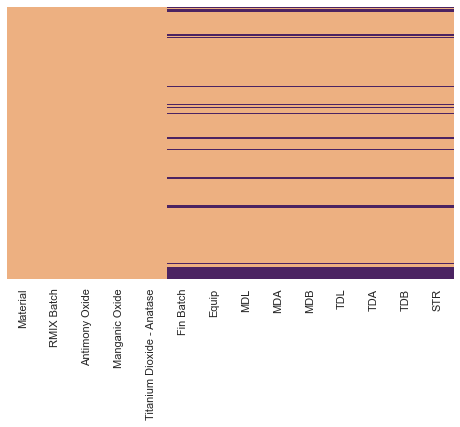

In [133]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="flare")

### Only interested in rows that have both ingredients and color values

In [134]:
df = df.dropna()

### Arrange product specifications to compare against color results

In [135]:
prod_specs_arr = product_specs_df.values  # create numpy array from product specifications df
prod_target_keys = target_test_keys(prod_specs_arr)  # creates a list of product test keys that are in specifications file
target_columns = get_target_columns(df.columns, prod_target_keys)  # creates a list of column name values from the selected file that match values in prod_target_keys list
prod_spec_dict = create_spec_dict(prod_specs_arr)  # creates a dict of prod test keys {key = test key: value = [lower limit value, upper limit value]}
prod_limits_dict = combine_limits(target_columns,prod_spec_dict) # create dict of all product limits {key = upper_limits or lower_limits: value = [all test key limits]}

### Compare product color results versus product specifications

In [136]:
test_values = df[target_columns].to_numpy(dtype=float)  # numpy array of color results that have an associated product specification
lower_limits = np.array(prod_limits_dict['lower_limits'])
upper_limits = np.array(prod_limits_dict['upper_limits'])
is_below_ll = (np.less(test_values,lower_limits))  # array displays true if test value below lower spec limit
is_above_ul = (np.greater(test_values,upper_limits))  # array displays true if test value above upper spec limit
combined_arr = np.add(is_below_ll, is_above_ul)  # adds the two boolean arrays 
# create dataframe of the reverse boolean numpy array (using ~)
combined_df_in_spec = ~pd.DataFrame(data=combined_arr[0:,0:],
                        index=(df['Fin Batch'].values),  #  assuming "Fin Batch" is a column name in selected product file
                        columns=target_columns)

### Merge 'in spec' column into combined df. This will be the working df.

In [137]:
combined_df_in_spec['is_in_spec'] = combined_df_in_spec.prod(1)  # create column in df to show if all test results for a batch are within all specifications
batch_in_spec_df = combined_df_in_spec['is_in_spec']
target_df = df.merge(batch_in_spec_df, how='left', left_on='Fin Batch', right_index=True)
# add column combining raws for future analysis
product_ingredients = formula_df['Ingredient'].tolist()
target_df['Raws Combined'] = target_df[product_ingredients].agg(','.join,axis=1)

### What raw combinations are being used the most?

[Text(0.5, 0, 'Total Batch Count'), Text(0, 0.5, '')]

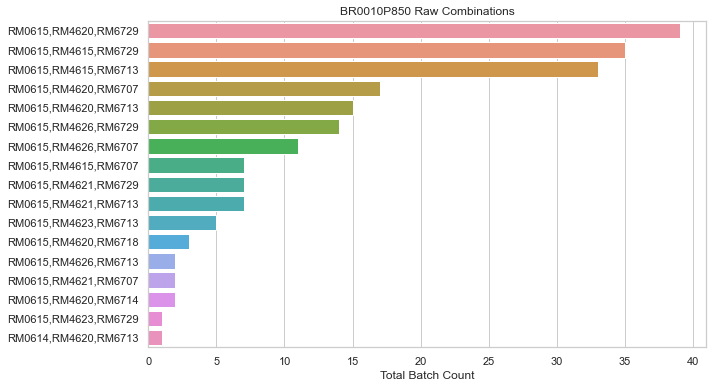

In [138]:

f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='Raws Combined',data=target_df,order=target_df['Raws Combined'].value_counts().index).set_title(selected_product + ' Raw Combinations')
ax.set(xlabel='Total Batch Count',ylabel="")

### How may batches were with specifications for each batch?


In [139]:
test_df1 = target_df[['Raws Combined','is_in_spec']].groupby('Raws Combined').agg(['count', 'sum']).reset_index()
test_df1['tot_count'] = test_df1['is_in_spec']['count']
test_df1['num_in_spec'] = test_df1['is_in_spec']['sum']
test_df1['per_in_spec'] = round((test_df1['num_in_spec']/test_df1['tot_count']*100),1)
test_df2 = test_df1[['Raws Combined','tot_count','num_in_spec','per_in_spec']].copy().sort_values(by='tot_count',ascending=False)

[(0.0, 40.0),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'In Spec Batches in total batches')]

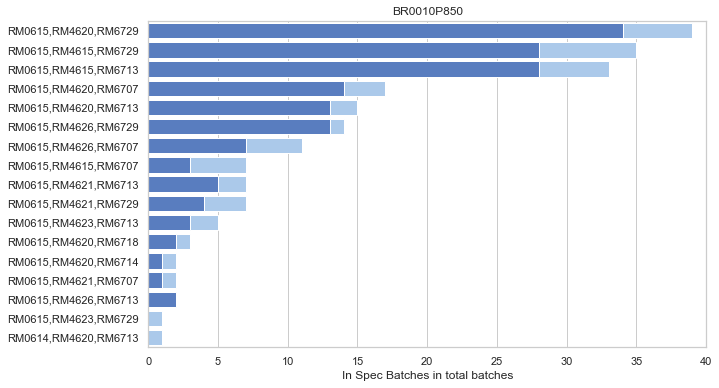

In [140]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(y='Raws Combined',x='tot_count', data=test_df2,color='b')

sns.set_color_codes("muted")
sns.barplot(y='Raws Combined',x='num_in_spec', data=test_df2, color='b').set_title(selected_product)
x_axis_scale = int(round_up(test_df2['tot_count'].max(),-1))
ax.set(xlim=(0, x_axis_scale), ylabel="",
       xlabel= "In Spec Batches in total batches")

### Is there any difference in color values based on raw combination?

##### MDL Boxplot

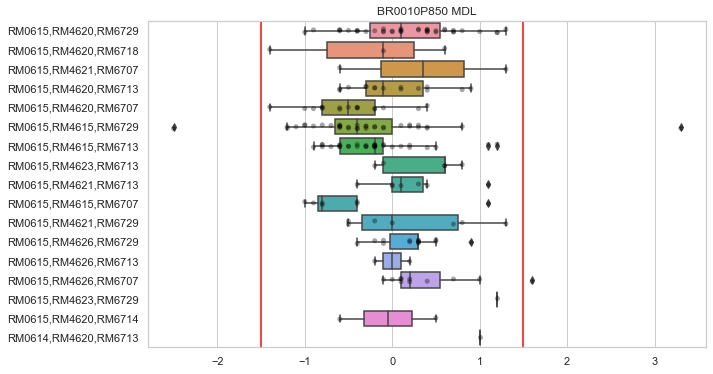

In [141]:
test_key = 'MDL'
# print(target_df.groupby(['Raws Combined'])[test_key].median())  # not sorted in same order displayed
test_key_limits = prod_spec_dict[test_key]
create_boxplot(target_df,test_key,test_key_limits,selected_product)

##### MDA Boxplot

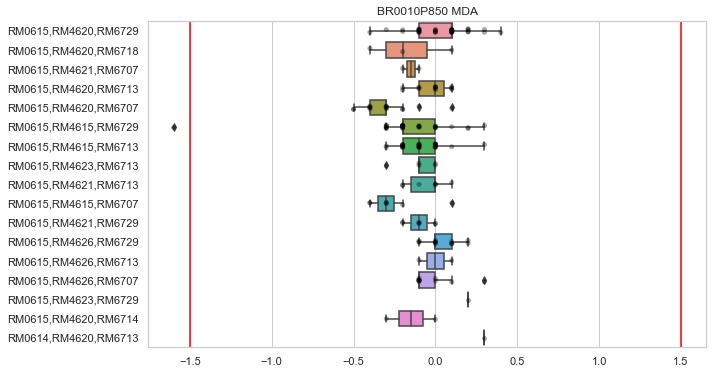

In [142]:
test_key = 'MDA'
test_key_limits = prod_spec_dict[test_key]
create_boxplot(target_df,test_key,test_key_limits,selected_product)

##### MDB Boxplot

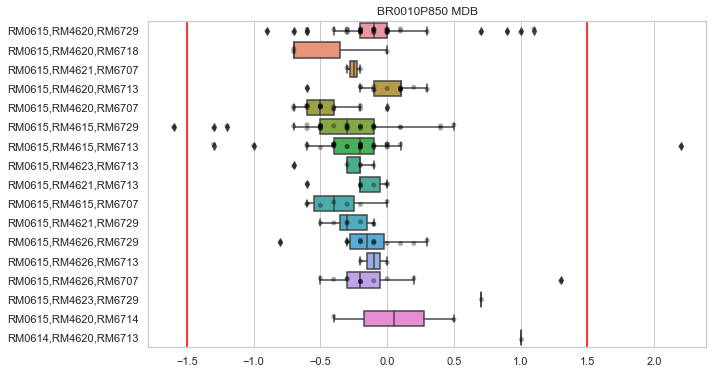

In [143]:
test_key = 'MDB'
test_key_limits = prod_spec_dict[test_key]
create_boxplot(target_df,test_key,test_key_limits,selected_product)

##### TDL Boxplot

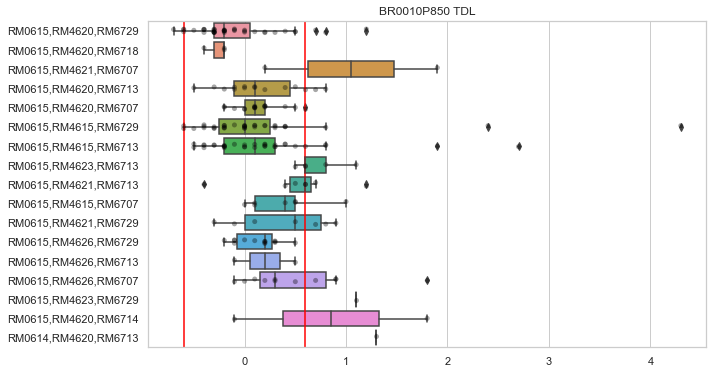

In [144]:
test_key = 'TDL'
test_key_limits = prod_spec_dict[test_key]
create_boxplot(target_df,test_key,test_key_limits,selected_product)

##### TDA Boxplot

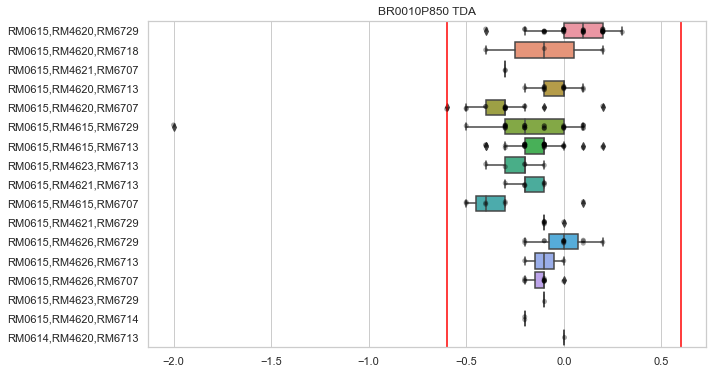

In [145]:
test_key = 'TDA'
test_key_limits = prod_spec_dict[test_key]
create_boxplot(target_df,test_key,test_key_limits,selected_product)

##### TDB Boxplot

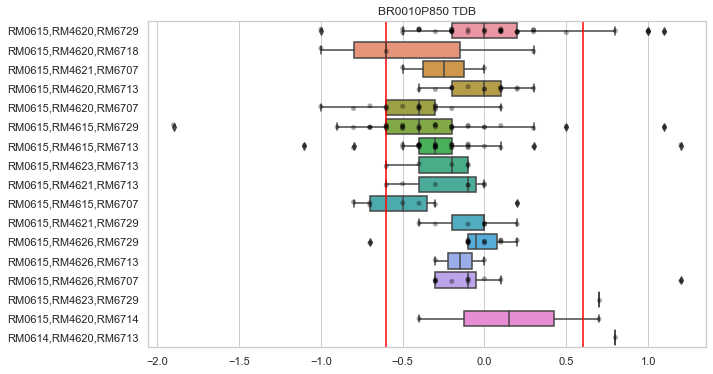

In [146]:
test_key = 'TDB'
test_key_limits = prod_spec_dict[test_key]
create_boxplot(target_df,test_key,test_key_limits,selected_product)